# Estudo de caso: Machine Learning para reconhecimento de máscaras!
por Maria Eduarda de Azevedo

<p align="center">
  <img src="https://raw.githubusercontent.com/MariaEduardaDeAzevedo/detector-de-mascaras/master/assets/gif-mascara.gif" width=500/>
</p>

A partir de agora iremos iniciar o treinamento do nosso modelo!

De modo geral, iremos utilizar o algoritmo K-Nearest Neighbors (KNN) para o treinamento de um modelo classificador que será capaz de identificar se uma pessoa está ou não portando uma máscara.

Mais uma vez, o nosso primeiro passo será importar as bibliotecas necessárias!

Mais uma vez utilizaremos a biblioteca **OpenCV** para lidar com nossas imagens, juntamente com a biblioteca **NumPy** e **matplotlib** para aplicações semelhantes as dos vídeos anteriores.

Como novidade, iremos trabalhar com a biblioteca **pandas**, afim de organizar melhor o nosso conjunto de dados e também a **scikit-learn**, que terá todo o aparato para o trabalho com Machine Learning.

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

Após importarmos as bibliotecas iremos carregar os nossos conjuntos de dados. Você poderá exercitar a sua montagem com os passos que vimos anteriormente, porém estou deixando aqui conjuntos de imagens prontos.

Como o conjunto compreende muitas imagens, a solução vista anteriormente não será interessante, já que não podemos fazer o upload de pastas. Porém, poderemos previamente subir os dados para nosso drive, montá-lo e acessar a pasta de forma direta.

Com nossos conjuntos de dados importados, poderemos agora montar e carregar um DataFrame do Pandas com as nossas imagens organizadas e classificadas.

In [ ]:
def carrega_dataframe():
    dados = {
        "ARQUIVO": [],
        "ROTULO": [],
        "ALVO": [],
    }

    caminho_com_mascara = "/content/drive/MyDrive/iaexpert/imagens/com-mascara"
    caminho_sem_mascara = "/content/drive/MyDrive/iaexpert/imagens/sem-mascara"

    com_mascara = os.listdir(caminho_com_mascara)
    sem_mascara = os.listdir(caminho_sem_mascara)

    for arquivo in com_mascara:
        dados["ARQUIVO"].append(f"{caminho_com_mascara}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"Com mascara")
        dados["ALVO"].append(1)
        
    for arquivo in sem_mascara:
        dados["ARQUIVO"].append(f"{caminho_sem_mascara}{os.sep}{arquivo}")
        dados["ROTULO"].append(f"Sem mascara")
        dados["ALVO"].append(0)
        
    dataframe = pd.DataFrame(dados)

    return dataframe

In [ ]:
dados = carrega_dataframe()

In [ ]:
dados.to_csv("/content/drive/MyDrive/iaexpert/imagens-df.csv")

In [3]:
dados = pd.read_csv("/content/drive/MyDrive/iaexpert/imagens-df.csv")

In [4]:
dados.head()

,Unnamed: 0,ARQUIVO,ROTULO,ALVO
0,0,/content/drive/MyDrive/iaexpert/imagens/com-ma...,Com mascara,1
1,1,/content/drive/MyDrive/iaexpert/imagens/com-ma...,Com mascara,1
2,2,/content/drive/MyDrive/iaexpert/imagens/com-ma...,Com mascara,1
3,3,/content/drive/MyDrive/iaexpert/imagens/com-ma...,Com mascara,1
4,4,/content/drive/MyDrive/iaexpert/imagens/com-ma...,Com mascara,1


In [5]:
def ler_imagens(dados):
  arquivos = dados["ARQUIVO"]
  imagens = list()

  for arquivo in arquivos:
    img = cv.cvtColor(cv.imread(arquivo), cv.COLOR_BGR2GRAY).flatten()
    imagens.append(img)  

  dados["IMAGEM"] = imagens

In [6]:
ler_imagens(dados)

In [7]:
dados.head()

,Unnamed: 0,ARQUIVO,ROTULO,ALVO,IMAGEM
0,0,/content/drive/MyDrive/iaexpert/imagens/com-ma...,Com mascara,1,"[66, 68, 72, 75, 77, 76, 75, 74, 68, 70, 70, 8..."
1,1,/content/drive/MyDrive/iaexpert/imagens/com-ma...,Com mascara,1,"[124, 123, 125, 127, 124, 121, 122, 127, 127, ..."
2,2,/content/drive/MyDrive/iaexpert/imagens/com-ma...,Com mascara,1,"[32, 13, 1, 4, 11, 9, 4, 2, 2, 4, 2, 1, 0, 3, ..."
3,3,/content/drive/MyDrive/iaexpert/imagens/com-ma...,Com mascara,1,"[140, 136, 144, 110, 111, 145, 136, 138, 128, ..."
4,4,/content/drive/MyDrive/iaexpert/imagens/com-ma...,Com mascara,1,"[113, 114, 115, 116, 117, 118, 119, 119, 121, ..."


Com nossos dados organizados em um DataFrame, já poderemos dividir em conjunto de treino e teste. Para isso utilizaremos o método **train_test_split()** do scikit-learn.

In [8]:
X = list(dados["IMAGEM"])
y = list(dados["ALVO"])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.99, random_state=13)

Depois de separar em treino e teste o nosso conjunto de dados, iremos partir para o refinamento das características da imagem. Desse modo, poderemos filtrar as características que são mais importantes para classificar uma face em uma imagem. 

Para isso, utilizaremos uma implementação da **Análise de Componentes Principais** (ACP ou PCA, no inglês). De modo geral, o PCA é um método que tem por finalidade analisar um conjunto de dados e escolher as formas mais representativas para tal. Ou seja, o PCA irá extrair da nossa imagem apenas as características mais notáveis para a classificação.

In [10]:
pca = PCA(n_components=30)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

Após extrairmos as características da nossa imagem utilizando o PCA, poderemos partir para o treinamento do KNN!

Para isso, utilizaremos a implementação do algoritmo para classificação no scikit-learn, dado por **KNeighborsClassifier()**. 

<p align="center">
  <img height=300 src="https://miro.medium.com/max/540/0*49s1xDlDKDsn55xa.gif"/>
</p>

Utilizaremos também a estratégia de Grid Search para a escolha dos hiperparâmetros necessários.

In [12]:
parametros = {
    "n_neighbors": [2, 3, 5, 11, 19, 23, 29],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattam", "cosine", "l1", "l2"]
}

In [13]:
knn = GridSearchCV(KNeighborsClassifier(), parametros)

In [14]:
knn.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattam', 'cosine', 'l1',
                                    'l2'],
                         'n_neighbors': [2, 3, 5, 11, 19, 23, 29],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Com o modelo treinado, poderemos agora observar as métricas do modelo.

In [15]:
knn.score(X=X_test, y=y_test)

0.9

In [17]:
predicao = knn.predict(X_test)

In [18]:
verdadeiros_positivos, falsos_positivos, falsos_negativos, verdadeiros_negativos = confusion_matrix(y_test, predicao).ravel()

In [19]:
verdadeiros_positivos, verdadeiros_negativos

(8, 1)

In [20]:
falsos_positivos, falsos_negativos

(1, 0)

In [21]:
from google.colab import files
importados = files.upload()
print("Arquivos importados:")
print(*importados, sep="\n")

Saving pessoas-na-rua.jpg to pessoas-na-rua.jpg
Saving pessoas-na-rua-2.jpg to pessoas-na-rua-2.jpg
Arquivos importados:
pessoas-na-rua.jpg
pessoas-na-rua-2.jpg


In [22]:
classificador = cv.CascadeClassifier(f"{cv.haarcascades}/haarcascade_frontalface_alt2.xml")

In [23]:
def processar_imagem(pca, classificador, imagem):
  img = cv.imread(imagem)
  imagem_cinza = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  faces = classificador.detectMultiScale(img)
  vetores = list()
  cont = 0
  fig = plt.figure(figsize=(10,10))
  for x,y,w,h in faces:
    face_cortada = imagem_cinza[y:y+h, x:x+w]
    fig.add_subplot(3, 3, cont+1)
    plt.imshow(cv.cvtColor(face_cortada, cv.COLOR_BGR2RGB))
    cont+=1
    face_cortada = cv.resize(face_cortada, (160,160))
    vetor = face_cortada.flatten()
    vetores.append(vetor)
  
  plt.show()
  return vetores

In [24]:
classes = {
    0: "Sem máscara",
    1: "Com máscara"
}

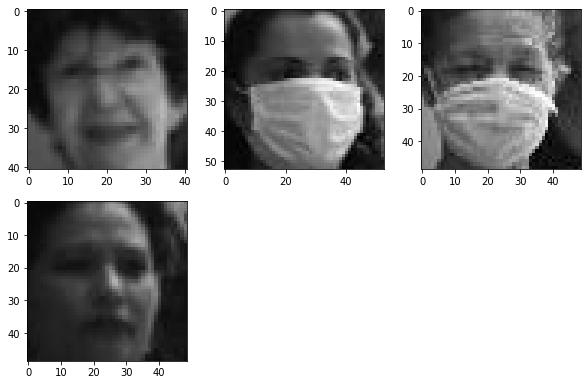

Sem máscara - Sem máscara - Com máscara - Sem máscara


In [25]:
vetores = processar_imagem(pca, classificador, "pessoas-na-rua.jpg")
c = knn.predict(pca.transform(vetores))

print(*[classes[e] for e in c], sep=" - ")

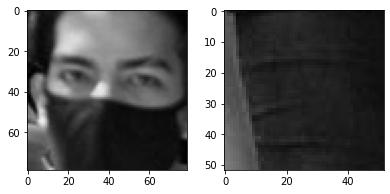

Com máscara - Sem máscara


In [26]:
vetores = processar_imagem(pca, classificador, "pessoas-na-rua-2.jpg")
c = knn.predict(pca.transform(vetores))

print(*[classes[e] for e in c], sep=" - ")